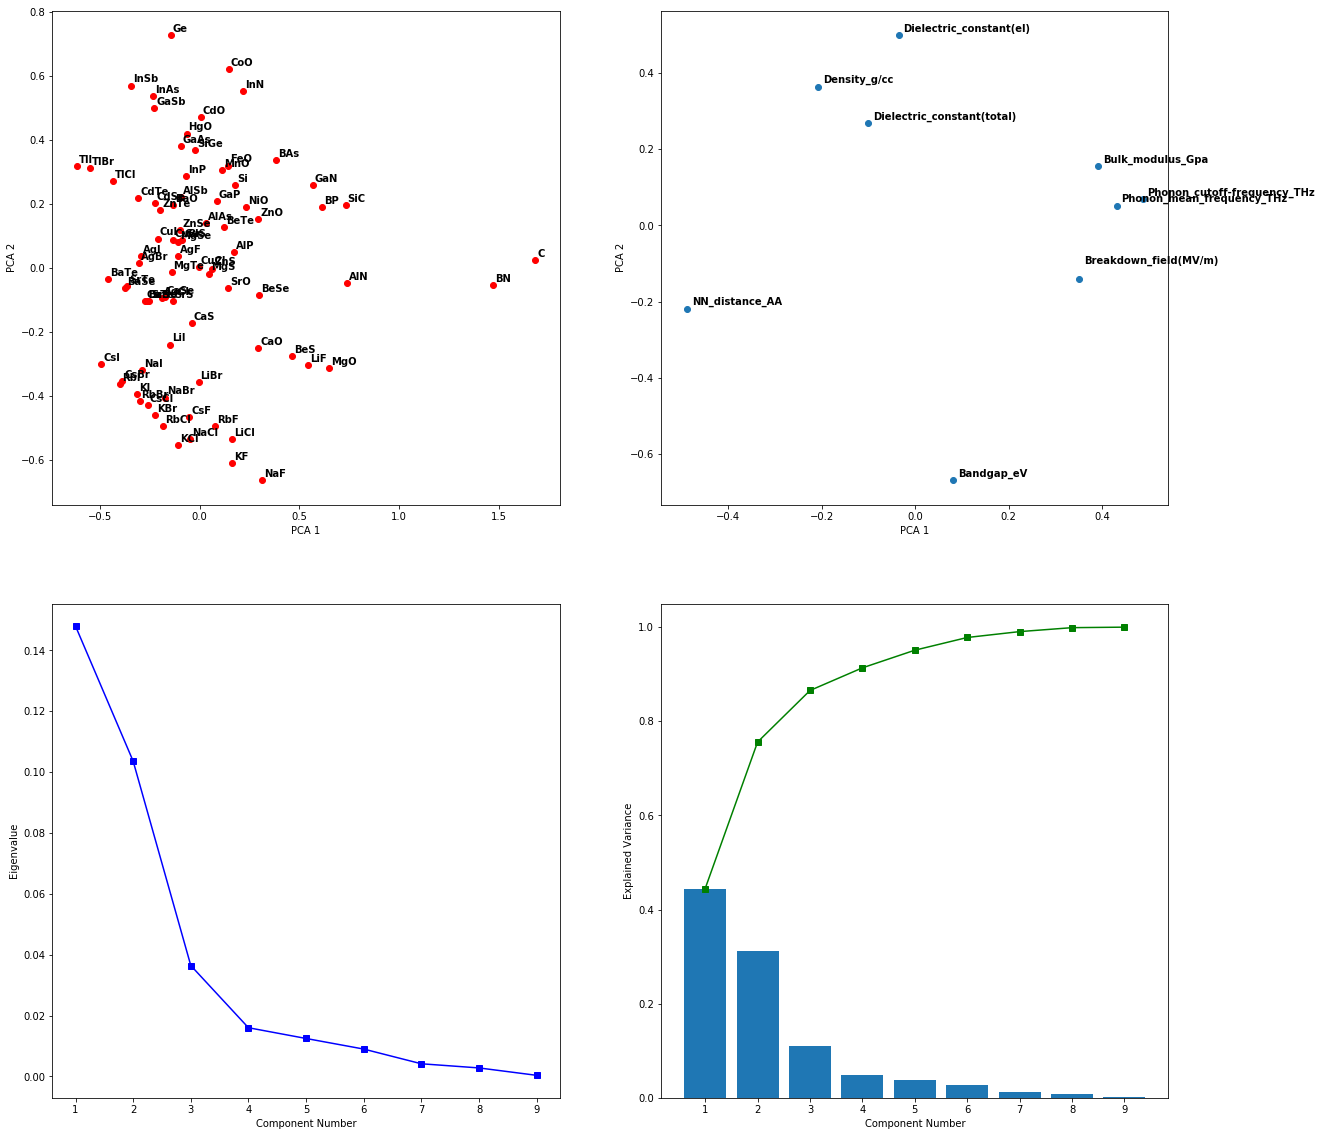

In [6]:
%matplotlib inline

#import modules and packages
import pandas as pd
import numpy as np

from numpy import genfromtxt
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import MinMaxScaler

########################################################################################
#define functions
def obtain_feature_list(filename,start):
    features = []
    open_file = open(filename,'r')
    for line in open_file:
        data = line.split(',')
        for index,d in enumerate(data):
            if index > start:
                features.append(d)
        break
    return features

def obtain_element_names(filename):
    elements = []
    open_file = open(filename,'r')
    for index,line in enumerate(open_file):
        if index > 0:
            data = line.split(',')
            elements.append(data[0])
    return elements

########################################################################################
#Main part of run

#setup jupyter inline parameters
plt.rcParams['figure.figsize'] = [20, 20]

#initialize plot objects
fig, ax = plt.subplots(2,2)

#file tags
periodic_table = 1
insulators = 0
random_numbers = 0

#read a given set of data
if periodic_table:
    file = '__SAMPLE_toy_data_atoms.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(1,14))
    features = obtain_feature_list(file,0)
    element_list = obtain_element_names(file)  
elif insulators:
    file = '__SAMPLE_binary_insulators.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(1,10))
    features = obtain_feature_list(file,0)
    element_list = obtain_element_names(file)
    
elif random_numbers:
    file = '__SAMPLE_toy_data_X1X2X3X4.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(0,7))
    features = obtain_feature_list(file,-1)
        

#normalize the incomining raw data
xscale = MinMaxScaler()
X = xscale.fit_transform(X)

#perform PCA on normalized data
pca = PCA()
X_tran = pca.fit_transform(X)

#grab the variance/ration terms
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

########################################################################################
#Plot the data in PCA(2) space
ax[0,0].scatter(X_tran[:,0],X_tran[:,1],color='r')
ax[0,0].set_xlabel('PCA 1')
ax[0,0].set_ylabel('PCA 2')

if periodic_table or insulators:
    for index, labels in enumerate(element_list):
        ax[0,0].text(X_tran[index,0]+0.01, X_tran[index,1]+.01, labels, horizontalalignment='left', size='medium', color='black', weight='semibold')
        
########################################################################################
#Identify feature clustering from PCA eigevectors        
ax[0,1].scatter(pca.components_[0, :],pca.components_[1, :])
ax[0,1].set_xlabel('PCA 1')
ax[0,1].set_ylabel('PCA 2')

for index, labels in enumerate(features):
    if index > len(variance) - 1:
        break
    ax[0,1].text(pca.components_[0, index]+0.01, pca.components_[1, index]+.01, labels, horizontalalignment='left', size='medium', color='black', weight='semibold')

########################################################################################
#Plot the eigenvalues
x = np.linspace(1,len(variance),len(variance))
ax[1,0].plot(x,variance,color='b',marker='s')
ax[1,0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,0].set_xlabel('Component Number')
ax[1,0].set_ylabel('Eigenvalue')

########################################################################################
#Compute the total variance ratio as a function of PC component
total_variance = np.zeros(len(variance_ratio))
for index,ratio in enumerate(variance_ratio):
    if index == 0:
        total_variance[index] = ratio
    else:
        total_variance[index] = total_variance[index - 1] + ratio

#Plot the variance ratios
ax[1,1].bar(x,variance_ratio)
ax[1,1].plot(x,total_variance,color='g',marker='s')
ax[1,1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,1].set_xlabel('Component Number')
ax[1,1].set_ylabel('Explained Variance')

#show the plot
plt.show()